<a href="https://colab.research.google.com/github/smritiirani/Stock-sentiment-analysis/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
### Data Collection
import pandas_datareader as pdr
key="0b679a6a3bb1aa728197f8e15e6f9504bd05bcb7"

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-4-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-12 00:00:00+00:00,221.07,225.00,219.84,224.94,49278740,52.927661,53.868565,52.633179,53.854200,197114960,0.0,1.0
1,AAPL,2018-09-13 00:00:00+00:00,226.41,228.35,222.57,223.52,41706377,54.206141,54.670608,53.286785,53.514230,166825508,0.0,1.0
2,AAPL,2018-09-14 00:00:00+00:00,223.84,226.84,222.52,225.75,31999289,53.590843,54.309090,53.274814,54.048127,127997156,0.0,1.0
3,AAPL,2018-09-17 00:00:00+00:00,217.88,222.95,217.27,222.15,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0
4,AAPL,2018-09-18 00:00:00+00:00,218.24,221.85,217.12,217.79,31571712,52.250114,53.114405,51.981968,52.142377,126286848,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-09-01 00:00:00+00:00,189.46,189.920,188.28,189.485,45766503,189.46,189.920,188.28,189.485,45766503,0.0,1.0
1252,AAPL,2023-09-05 00:00:00+00:00,189.70,189.980,187.61,188.280,45280027,189.70,189.980,187.61,188.280,45280027,0.0,1.0
1253,AAPL,2023-09-06 00:00:00+00:00,182.91,188.850,181.47,188.400,81755816,182.91,188.850,181.47,188.400,81755816,0.0,1.0
1254,AAPL,2023-09-07 00:00:00+00:00,177.56,178.210,173.54,175.180,112488803,177.56,178.210,173.54,175.180,112488803,0.0,1.0
1255,AAPL,2023-09-08 00:00:00+00:00,178.18,180.239,177.79,178.350,65602066,178.18,180.239,177.79,178.350,65602066,0.0,1.0


In [10]:
df1=df.reset_index()['close']

In [11]:
df1

0       221.07
1       226.41
2       223.84
3       217.88
4       218.24
         ...  
1251    189.46
1252    189.70
1253    182.91
1254    177.56
1255    178.18
Name: close, Length: 1256, dtype: float64

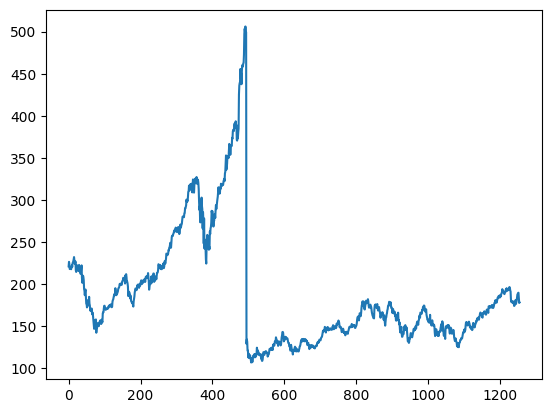

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [14]:
import numpy as np
df1

0       221.07
1       226.41
2       223.84
3       217.88
4       218.24
         ...  
1251    189.46
1252    189.70
1253    182.91
1254    177.56
1255    178.18
Name: close, Length: 1256, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.28611146]
 [0.29948654]
 [0.29304947]
 ...
 [0.19053225]
 [0.17713212]
 [0.17868503]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(816, 440)

In [19]:
train_data

array([[2.86111459e-01],
       [2.99486537e-01],
       [2.93049468e-01],
       [2.78121478e-01],
       [2.79023168e-01],
       [2.79348779e-01],
       [2.83506575e-01],
       [2.77570445e-01],
       [2.85410144e-01],
       [2.88916719e-01],
       [2.84483406e-01],
       [2.95829681e-01],
       [2.97808391e-01],
       [3.01615529e-01],
       [3.06675016e-01],
       [3.13663118e-01],
       [3.03443957e-01],
       [2.94176581e-01],
       [2.92874139e-01],
       [3.00638698e-01],
       [2.74314339e-01],
       [2.69530369e-01],
       [2.88716343e-01],
       [2.76819036e-01],
       [2.88816531e-01],
       [2.86412023e-01],
       [2.73462743e-01],
       [2.81703193e-01],
       [2.85059487e-01],
       [2.90269255e-01],
       [2.71133375e-01],
       [2.82930495e-01],
       [2.74164058e-01],
       [2.63994991e-01],
       [2.66649969e-01],
       [2.80576080e-01],
       [2.88991860e-01],
       [2.52072636e-01],
       [2.37319975e-01],
       [2.42780213e-01],


In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 344ms/step - loss: 0.0350 - val_loss: 0.0015
Epoch 2/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0120 - val_loss: 8.3796e-04
Epoch 3/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0097 - val_loss: 3.2852e-04
Epoch 4/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0077 - val_loss: 2.9622e-04
Epoch 5/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0088 - val_loss: 0.0014
Epoch 6/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0083 - val_loss: 0.0012
Epoch 7/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0063 - val_loss: 2.7151e-04
Epoch 8/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0056 - val_loss: 2.7566e-04
Epoch 9/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0057 - val_loss: 3.8886e-04
Epoch 10/100
12/12 [==============================] - 3s 208ms/ste

In [29]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 35ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.04762581903883361

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.015599551868933305

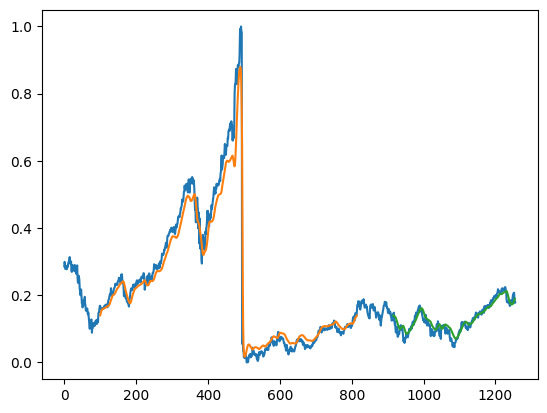

In [34]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

440

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.15226048841577958,
 0.1498058860363181,
 0.14572323105823418,
 0.1464996869129618,
 0.142592360676268,
 0.1425673137132122,
 0.15421415153412646,
 0.15739511584220414,
 0.15716969317470256,
 0.15453976205385092,
 0.1518096430807764,
 0.14765184721352534,
 0.1671383844708829,
 0.1669630557294928,
 0.16262993112085158,
 0.1671008140262993,
 0.167589229805886,
 0.1646336881653099,
 0.16338134001252344,
 0.16338134001252344,
 0.1649342517219787,
 0.1708453350031309,
 0.17112085159674387,
 0.16871634314339382,
 0.16210394489668126,
 0.16280525986224167,
 0.16568566061365061,
 0.17179711959924857,
 0.17648090169067002,
 0.17635566687539136,
 0.18346900438321853,
 0.18562304320601122,
 0.18219160926737635,
 0.18126487163431435,
 0.17778334376956792,
 0.1846712586098935,
 0.185648090169067,
 0.19273638071383842,
 0.19153412648716345,
 0.1931371321227301,
 0.19829680651221038,
 0.19556668753913586,
 0.19579211020663745,
 0.19316217908578587,
 0.20077645585472764,
 0.1999749530369443,
 0.1964

In [63]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=1000
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

ValueError: ignored

In [43]:
from numpy import array

# Initialize x_input with your initial data (assuming temp_input contains historical data)
x_input = np.array(temp_input[-100:])  # Take the last 100 data points as the initial input
n_steps = 100
lst_output = []

i = 0
while i < 30:
    if len(x_input) >= 100:
        x_input_reshaped = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input_reshaped, verbose=0)

        # Append the prediction to the output list
        lst_output.extend(yhat.tolist())

        # Update x_input by removing the oldest data point and adding the prediction
        x_input = np.append(x_input[1:], yhat[0])

        i = i + 1
    else:
        # Handle the case where you don't have enough data points to make predictions
        print("Insufficient data for prediction.")
        break

print(lst_output)


Insufficient data for prediction.
[]


In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt
len(df1)

1256

ValueError: ignored

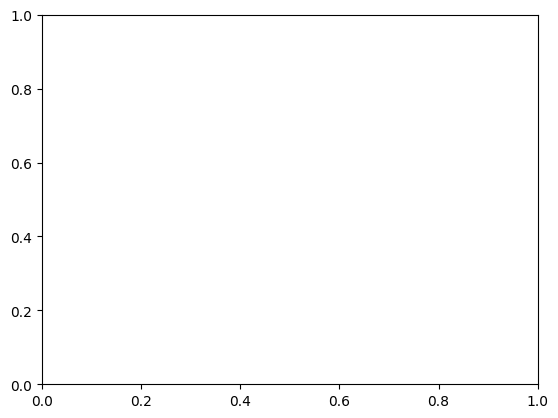

In [66]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

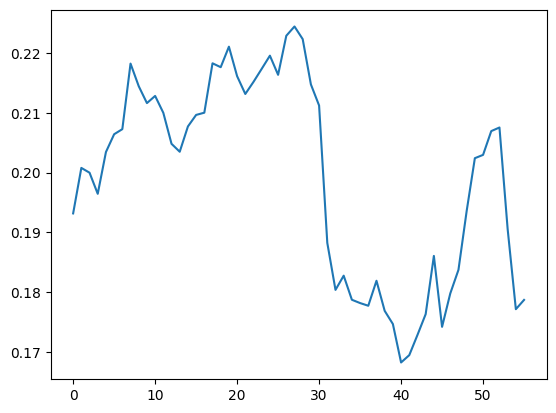

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

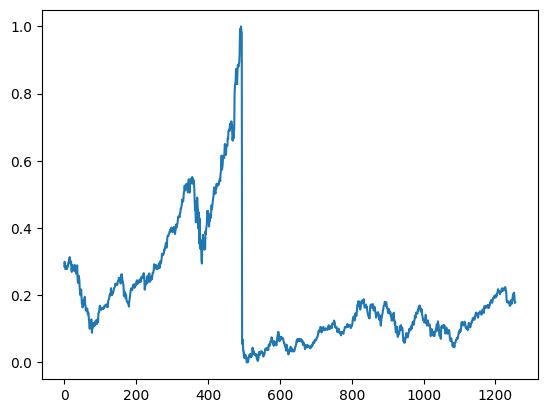

In [47]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)